# Planos en el espacio 3D. Distancias entre planos y rectas

En esta sección veremos cómo definir correctamente los planos en el espacio tridimensional, cómo visualizarlos en Python y cómo calcular distancias entre puntos, rectas y planos.


## Ecuaciones del plano

Para caracterizar un plano, al igual que con una recta, nos basta un punto en el mismo y un vector... sólo que ahora el vector que necesitamos debe ser ortogonal al plano.

* Entonces, si el punto que conocemos en el plano es $P=(a,b,c)$ y el vector perpendicular al plano es $\mathbf{n} = \left( n_{1}, n_{2}, n_{3} \right)$, un punto $Q = (x,y,z)$ 
estará en el plano si y sólo si los vectores $\vec{PQ}$ y $\mathbf{n}$ son ortogonales. Es decir, si y sólo si $\vec{PQ}\cdot\mathbf{n} = 0$.

    Si escribimos matemáticamente esta idea obtenemos la **forma estándar** para la ecuación de un plano:

    \begin{eqnarray*}
    \vec{PQ}\cdot\mathbf{n} = 0 &\Rightarrow& \left( x-a, y-b, z-c \right)\cdot\left( n_{1}, n_{2}, n_{3} \right) = 0 \\ 
    &\Rightarrow& n_{1} (x-a) + n_{2} (y-b) + n_{3} (z-c) = 0.
    \end{eqnarray*}

* Si reagrupamos los términos, se obtiene la **forma general** de la ecuación de un plano:

    $$
    Ax+By+Cz+D = 0.
    $$

    Observa que, de despejar en la forma estándar, $A=n_{1}$, $B=n_{2}$, $C=n_{3}$ y $D = n_{1}a+n_{2}b+n_{3}c$. Por lo tanto, si conocemos la forma canónica de un plano, $Ax+By+Cz+D=0$, 
    también conoceremos un vector normal a este plano: $\mathbf{n} = (A,B,C)$.


Aquí mostramos, en la misma aplicación de Allan Avendaño que ya usamos para rectas, https://www.geogebra.org/m/Ght27Hfp, una visualización de la forma general de un plano:

<img src="../../images/1.7.plano.jpg" width="500"/>

Destaquemos que el vector normal a un plano se puede calcular si conocemos dos vectores dentro del plano (utilizando el producto vectorial) o, 
restando vectores, si conocemos tres puntos en el plano, como mostramos en el siguiente ejercicio, resuelto aprovechando la potencia de Python:

## Ejercicio y visualización de un plano con `matplotlib`

Vamos a resolver el siguiente ejercicio, con la ayuda de `Numpy`, y lo aprovecharemos para mostrar cómo se puede visualizar un plano con `matplotlib`. 

Se trata de **encontrar la ecuación general del plano que contiene los puntos $(2,1,1)$, $(1,4,1)$ y $(-2,0,4)$**.

'n: '

array([ 9,  3, 13])

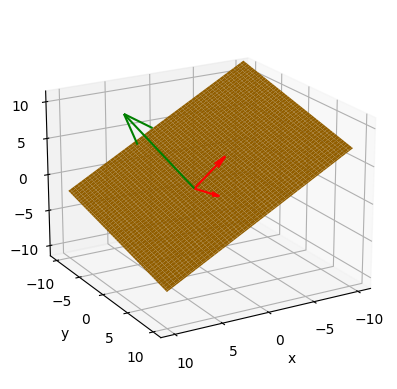

In [8]:
from mpl_toolkits import mplot3d
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Introducimos los 3 puntos en el plano conocidos
P1 = np.array([2, 1, 1])
P2 = np.array([1, 4, 1])
P3 = np.array([-2, 0, 4])

# Calculamos dos vectores dentro del plano
v1 = P2-P1
v2 = P3-P1

# Ahora calculamos un vector perpendicular a esos dos
n = np.cross(v1,v2)

# Ecuación del plano: n[0]*(x-P1[0])+n[1]*(y-P1[1])+n[2]*(z-P1[2])=0
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
z = sp.Symbol('z', real=True)

# Definimos la forma estándar del plano
plano_exp = n[0]*(x-P1[0])+n[1]*(y-P1[1])+n[2]*(z-P1[2])

# Dejamos que sympy despeje z (para evitar errores humanos)
z_exp = sp.solve(plano_exp,z)[0]

# Lo convertimos en una función lambdify, para poderlo evaluar en una nube de puntos
z_plano = sp.lambdify([x,y],z_exp)

# Creamos un array de puntos en el dominio [-10,10] x [-10,10]
xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(xx, yy)

# Evaluamos la función z para el plano en esta nube de puntos
zz = z_plano(xx,yy)

# Crear figura y ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar superficie
ax.plot_surface(xx, yy, zz1, color='orange')

# Pintamos, en rojo, los vectores v1 y v2 en el plano y en verde el vector n
ax.quiver([P1[0]], [P1[1]], [P1[2]], [v1[0], v2[0], n[0]], [v1[1], v2[1], n[1]], [v1[2], v2[2], n[2]], 
          color=['r','r','g','r','r','r','r','g','g'])

# Ajuste de los límites de los ejes
ax.set_xlim([-11,11])
ax.set_ylim([-11,11])
ax.set_zlim([-11,11])

# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Orientamos los ejes
ax.azim = 60
ax.elev = 20

# Mostrar gráfico
plt.show()


## Ángulo entre planos

Dos planos distintos en el espacio o bien son paralelos o bien se cruzan, intersecando en una recta.
En este último caso, podemos calcular el ángulo que queda entre los dos planos evaluando el ángulo entre los dos vectores normales.

<img src="../../images/1.7.angulo_planos.jpg" width="250"/>

Entonces, utilizando la fórmula que aprendimos al definir el producto escalar, podemos definir el **ángulo que existe entre dos planos no paralelos**, 
con vectores normales $\mathbf{n_{1}}$ y $\mathbf{n_{2}}$, respectivamente como el ángulo

$$
\theta = \arccos \left( \frac{\left| \mathbf{n_{1}} \cdot \mathbf{n_{2}} \right|} { \left\| \mathbf{n_{1}} \right\| \left\| \mathbf{n_{2}} \right\| } \right).
$$

En consecuencia, estos planos serán:

1. Perpendiculares cuando $\mathbf{n_{1}} \cdot \mathbf{n_{2}} = 0$.
2. Paralelos cuando $\mathbf{n_{2}} = c \mathbf{n_{1}}$.

## Distancia entre un punto y un plano

Vamos a ver ahora cómo calcular la distancia entre un punto $Q=\left( q_{1}, q_{2}, q_{3} \right)$ y un plano de ecuación $Ax+By+Cz+D=0$.

En este caso, basta buscar un punto arbitrario en el plano, $P=\left( p_{1}, p_{2}, p_{3} \right)$ y calcular la proyección del vector $\vec{PQ}$ 
en la dirección que marca el vector normal $\mathbf{n}$, como se muestra en la siguiente figura.

<img src="../../images/1.7.distancia_punto_plano.jpg" width="250"/>

**Nota:** Para calcular un punto $P$ en el plano, a partir de la forma general de éste, podemos, por ejemplo, calcular la $x$ que corresponde a $y=z=0$: $Ax+0+0+D=0 \Rightarrow x = -\frac{D}{A}$. 
Entonces podríamos elegir $P=\left(-\frac{D}{A},0,0\right)$.

Resumimos en la siguiente propiedad:

````{prf:property} 
:label: prop_1.7_distancia_punto_plano
:nonumber: 

La distancia de un punto $Q$ a un plano es

$$
\mathrm{Distancia} = \left\| \mathrm{proy}_{\mathbf{n}} \vec{PQ} \right\| = \frac{\left| \vec{PQ}\cdot\mathbf{n} \right|}{\|\mathbf{n}\|},
$$
siendo $P$ un punto cualquiera en el plano y $\mathbf{n}$ un vector normal al mismo.
````

## Distancia entre un punto y una recta

Razonando de forma análoga, podemos calcular la distancia desde un punto $Q$ a una recta. 

La única diferencia es que en el caso de la recta solemos conocer un vector dentro de la recta (su vector director), no uno ortogonal a la misma. 
Por eso, para calcular lo análogo a la proyección con el producto escalar que aparece en el numerador de la fórmula anterior, usaremos el producto vectorial 
(que genera un vector ortogonal) entre $\vec{PQ}$ y el vector director de la recta.

En resumen:

````{prf:property} 
:label: prop_1.7_distancia_punto_recta
:nonumber: 

La distancia de un punto $Q$ a una recta es

$$
\mathrm{Distancia} = \frac{\left\| \vec{PQ}\times\mathbf{u} \right\|}{\|\mathbf{u}\|},
$$
siendo $P$ un punto cualquiera en la recta y $\mathbf{u}$ un vector director de la misma.

````

Vamos a calcular, a modo de **ejemplo**, la distancia desde un punto a un plano y a una recta:

In [16]:
# Ejercicio: Calcular la distancia desde el punto Q=(1,5,-4) al plano 3x-y+2z+6=0 
# y a la recta (x-5)/2 = (y+3)/4 = (z-1)/-3

import numpy as np

# Definimos el punto Q
Q = np.array([1, 5, -4])

# Definimos el vector normal al plano
n = np.array([3, -1, 2])
# Un punto en el plano
P = np.array([-2, 0, 0])

# Calculamos la distancia de Q al plano
PQ = Q-P
distancia_plano = np.abs( np.dot(PQ,n) ) / np.linalg.norm(n)

print('Distancia de Q al plano: ', distancia_plano)

# Para la recta:
P_recta = np.array([5,-3,1])
u_recta = np.array([2,4,-3])

PQ_recta=Q-P_recta
proyeccion_recta = np.cross(PQ_recta,u_recta)
distancia_recta = np.linalg.norm(proyeccion_recta) / np.linalg.norm(u_recta)

print('Distancia de Q a la recta: ', distancia_recta)

Distancia de Q al plano:  1.0690449676496976
Distancia de Q a la recta:  7.249256799005747
